## INTRODUCTION
One of the most important problems today is Road Safety. 
Road accidents can be serious or even fatal. The aim of this project is to build a model that predicts the severity of road accidents in Seattle City with attributes as light conditions and weather.  

The target audience of this project would be the local athorities for them to help and predict the area / address where road accidents may accure in the future backed by former data. This could later on lead to applying new road safety measures for the specific areas.

### DATA UNDERSTANDING

This is an extensive data set from the Seattle Police Department, with over 190,000 observations collected over the last 15+ years.

In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC' (Description of the collision), 'WEATHER' and 'LIGHTCOND'.

Severity codes are as follows:

1 : Very Low Probablility - Chance or Property Damage

2 : Low Probability - Chance of Injury

3 : Mild Probability - Chance of Serious Injury

4 : High Probability - Chance of Fatality

In it's original form, this data is not the best fit for analysis. We must clean the data for our desires to make the best predictions possible. 

We use Jupyter Notebooks to conduct the analysis and all strats with importing all the necessary Python libraries like Pandas, Numpy, Matplotlib.

The data used for this study is provided by Coursera and can be found by clicking the following link: 
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


### VIEWING AND IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\achris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### DATA CLEANING

In [5]:
# Dropping all columns expect 'SEVERITYDESC', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'WEATHER', 'LIGHTCOND'

df.drop(df.columns.difference(['SEVERITYDESC', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'WEATHER', 'LIGHTCOND'])\
, axis=1, inplace=True)
df.head()

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight


In [6]:
# Checking NaN's

In [7]:
df.describe(include='O')

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
count,192747,194673,188344,194673,189592,189503
unique,3,2,7,39,11,9
top,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
freq,126926,136485,89800,85209,111135,116137


In [8]:
df_with_nans=df.dropna()
df_with_nans.shape

(182954, 6)

In [9]:
df=df.reset_index(drop=True)
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
...,...,...,...,...,...,...
194668,Block,Injury Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
194669,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight
194670,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
194671,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk


In [10]:
#Checking to confirm no more null values
df.isnull().sum()

ADDRTYPE        1926
SEVERITYDESC       0
JUNCTIONTYPE    6329
SDOT_COLDESC       0
WEATHER         5081
LIGHTCOND       5170
dtype: int64

### DATA VISUALISATION

In [11]:
import seaborn as sns
sns.set(style="darkgrid")

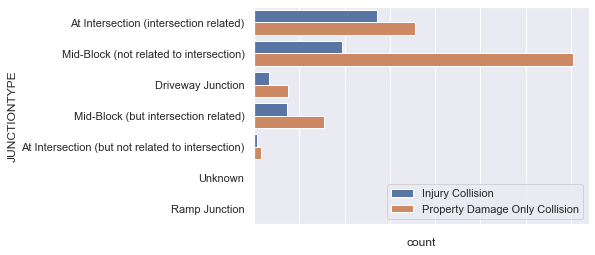

In [12]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYDESC", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

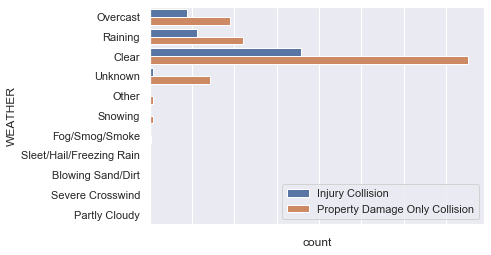

In [13]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYDESC", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

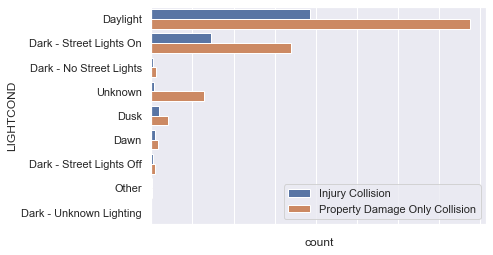

In [14]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [15]:
Feature=df['SEVERITYDESC']
Feature=pd.concat([Feature, pd.get_dummies(df[['ADDRTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','LIGHTCOND']])], axis=1)

Feature.head()

,SEVERITYDESC,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
Feature.drop(['SEVERITYDESC'], axis=1, inplace=True)
Feature

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
194669,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
194670,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194671,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X=Feature
X[0:5]

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
y=df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [19]:
print("Feature shape:", Feature.shape)
print("X shape:",X.shape)
print ("y shape:", y.shape)

Feature shape: (194673, 69)
X shape: (194673, 69)
y shape: (194673,)


### MODELLING (TRAIN TEST SPLIT)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (155738, 69) (155738,)
test set: (38935, 69) (38935,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [22]:
#Modelling phase
Accident_Severity_Model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accident_Severity_Model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
#Predicting phase
Predicting_Severity=Accident_Severity_Model.predict(X_test)
print(Predicting_Severity [0:5])
print(y_test [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Injury Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Injury Collision' 'Injury Collision']


In [24]:
#Accuracy of the model using sklearn
from sklearn import metrics
print("Decision Tress Accuracy:", metrics.accuracy_score(y_test, Predicting_Severity))

Decision Tress Accuracy: 0.7469628868627199


### EVALUATION

In [25]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [26]:
Tree_Prediction=Accident_Severity_Model.predict(X_test)
jc=jaccard_similarity_score(y_test, Tree_Prediction)
fs=f1_score(y_test, Tree_Prediction, average='weighted')

C:\Users\achris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [27]:
list_jc = [jc]
list_fs = [fs]

In [28]:
df = pd.DataFrame(list_jc, index=['Decision Tree:'])

df.columns = ['Jaccard-index']
df.insert(loc=1, column='F1-score', value=list_fs)

df

,Jaccard-index,F1-score
Decision Tree:,0.746963,0.678211
